# Assignment 1 - Team Data Pirates

## Pre Processing

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

### Reading data from the file

In [2]:
real_estate= pd.read_excel("cleaned_data.xlsx")

### Converting some attributes to int

In [3]:
real_estate['Price']=real_estate['Price'].astype(str)
real_estate['Price_per_unit_area']=real_estate['Price_per_unit_area'].astype(str)
real_estate['Size']=real_estate['Size'].astype(str)

In [4]:

real_estate['Price']=real_estate['Price'].str.replace(',','')
real_estate['Price']=real_estate['Price'].astype(int)
real_estate['Price_per_unit_area']=real_estate['Price_per_unit_area'].str.replace(',','')
real_estate['Price_per_unit_area']=real_estate['Price_per_unit_area'].astype(int)
real_estate['Size']=real_estate['Size'].str.replace(',','')
real_estate['Size']=real_estate['Size'].str.replace(' sq ft','')
real_estate['Size']=real_estate['Size'].astype(int)

### Sorting the data based on Price of the property

In [5]:
price_sorted=real_estate.sort_values(by='Price',ascending=True)
question_1=np.array_split(price_sorted,3)

### Creating new column which shows the economic range of the values

In [6]:
max1=question_1[0]['Price'].max()
max2=question_1[1]['Price'].max()
max3=question_1[2]['Price'].max()

def categorise(row):  
    if row['Price'] <= max1:
        return 'Cheap'
    elif row['Price'] > max1 and row['Price'] <= max2:
        return 'Moderate'
    elif row['Price'] > max2  and row['Price'] <= max3:
        return 'Expensive'
    return 'D'

real_estate['cost'] = real_estate.apply(lambda row: categorise(row), axis=1)

## Question 1

### Plotting Average Price per unit area and Size in each economic range

This helps us to visualize the following:- <br>
1. The average Price per unit area for each economic range
2. The average size of the property for each economic range

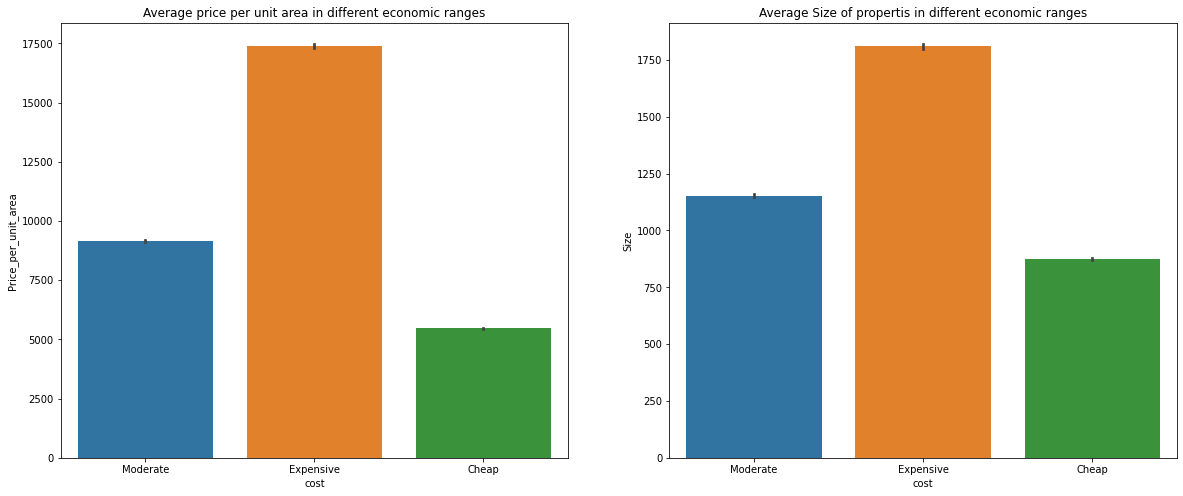

In [7]:
fig=plt.figure(figsize = [20,8])
fig.add_subplot(121)
sns.barplot(x='cost',y='Price_per_unit_area',data=real_estate).set_title('Average price per unit area in different economic ranges')


fig.add_subplot(122)
sns.barplot(x='cost',y='Size',data=real_estate).set_title('Average Size of propertis in different economic ranges')
plt.show()

### plotting the number of properties in different economic range in different countries

The analysis we get from this:-
1. We can see which city has more number of cheap properties and so on.
2. for example, kolkata has more cheap properties than the moderate and expensive properties.
3. But Mumbai might be the best option has it has high number of properties in every economic range

<AxesSubplot:xlabel='City_name', ylabel='Count'>

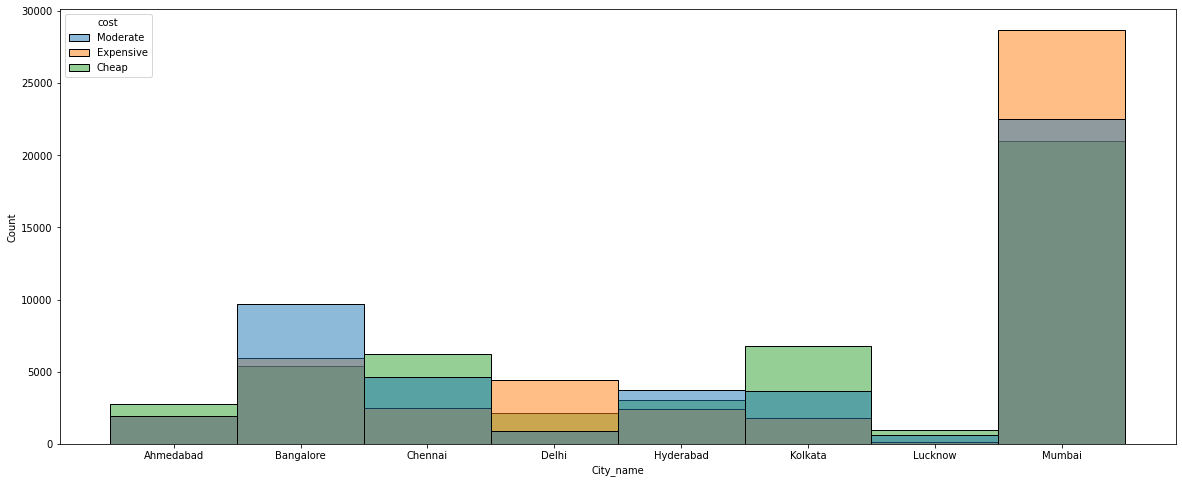

In [8]:
fig=plt.figure(figsize = [20,8])
sns.histplot(x='City_name',hue='cost',data=real_estate)

### Failed Attempts

1. Tried to histogram for different economic range - as we divided the range based on the count of properties, all 3 ranges will have same amount of properties.

## Question 2

### Plotting number of ready to move properties in Tech cities

The analysis we can make with the help of this:-
1. The number of properties in each economic range in tech cities.
2. we can observe that Hyderabad has the lowest no. of properties in every economic range. So, if you want to have many options, choose the other two cities.
3. We have large number of properties in cheap range in Chennai than the other two cities.
4. Bangalore consists the highest number of properties

Text(0.5, 1.0, 'The number of ready to move properties in different price ranges in tech cities')

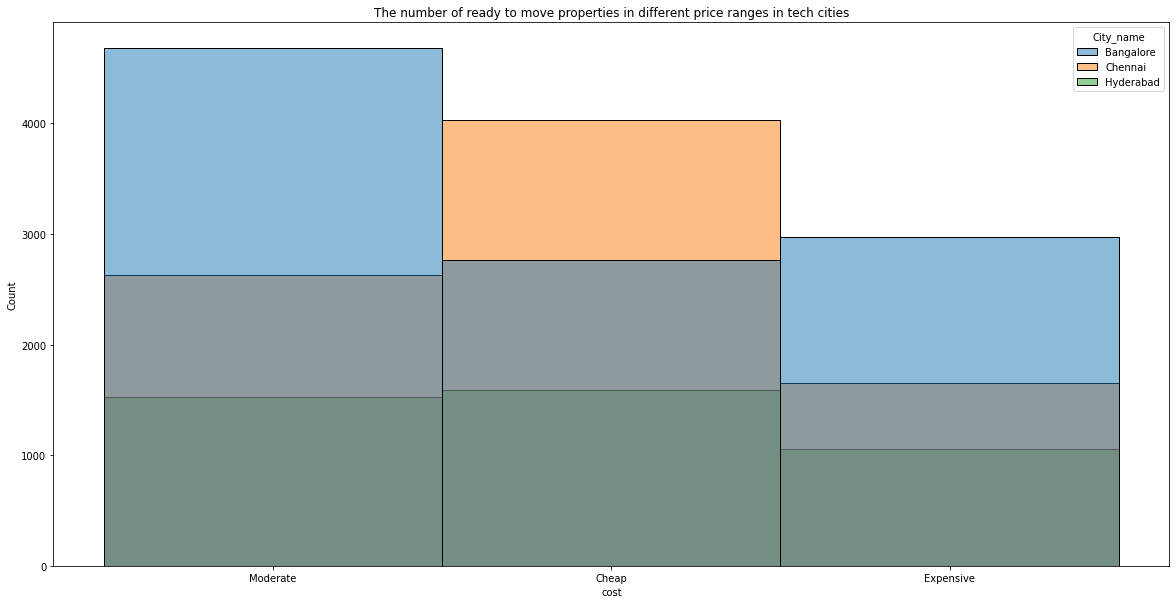

In [9]:
Tech_city=real_estate[real_estate['City_name'].isin(["Chennai","Bangalore","Hyderabad"])]
Tech_city=Tech_city.where(Tech_city['is_ready_to_move']==True)
fig=plt.figure(figsize = [20,10])

sns.histplot(x='cost',hue='City_name',data=Tech_city).set_title("The number of ready to move properties in different price ranges in tech cities")


### Average Price and Size in Tech cities

The analysis we can make with the help of this:-
1. We can see that Bangalore has the highest price per unit area followed by Chennai and Hyderabad.
2. We can see that Hyderabad has the highest average size of the properties followed by Bangalore and Chennai.
3. This means that the value of land in tech cities is as follows: Bangalore>Chennai>Hyderabad
4. For the value of money will be best in Hyderabad as it has highest average size and lowest price per unit area

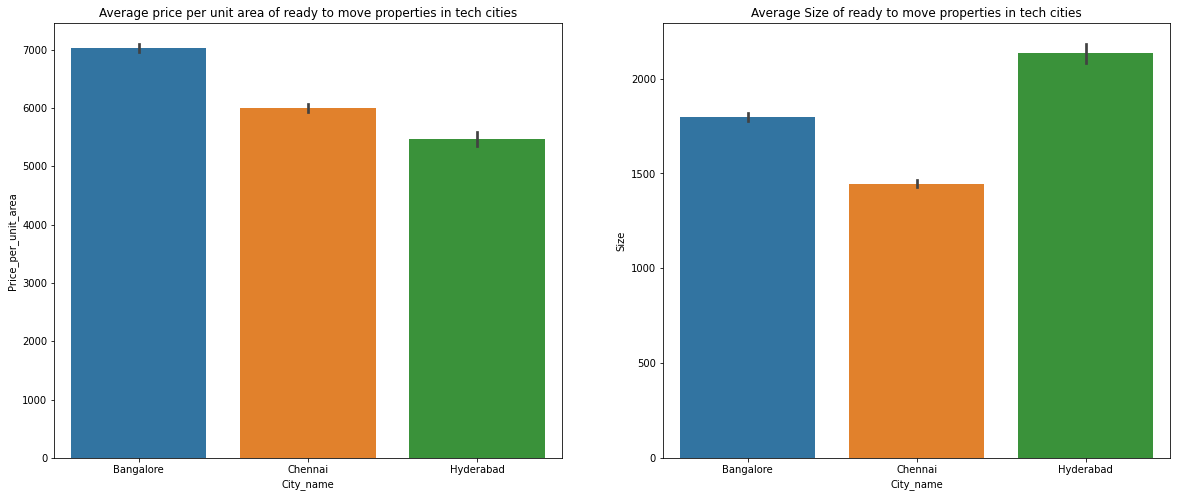

In [10]:
fig=plt.figure(figsize = [20,8])
fig.add_subplot(121)
sns.barplot(x='City_name',y='Price_per_unit_area',data=Tech_city).set_title('Average price per unit area of ready to move properties in tech cities')


fig.add_subplot(122)
sns.barplot(x='City_name',y='Size',data=Tech_city).set_title('Average Size of ready to move properties in tech cities')
plt.show()

### Price vs size plot in tech cities

The analysis we can make from this:-
1. The same type of analysis as the last plot but with more detailing.
2. As we saw from previous plot, here also Hyderabad seems to be best option for money.

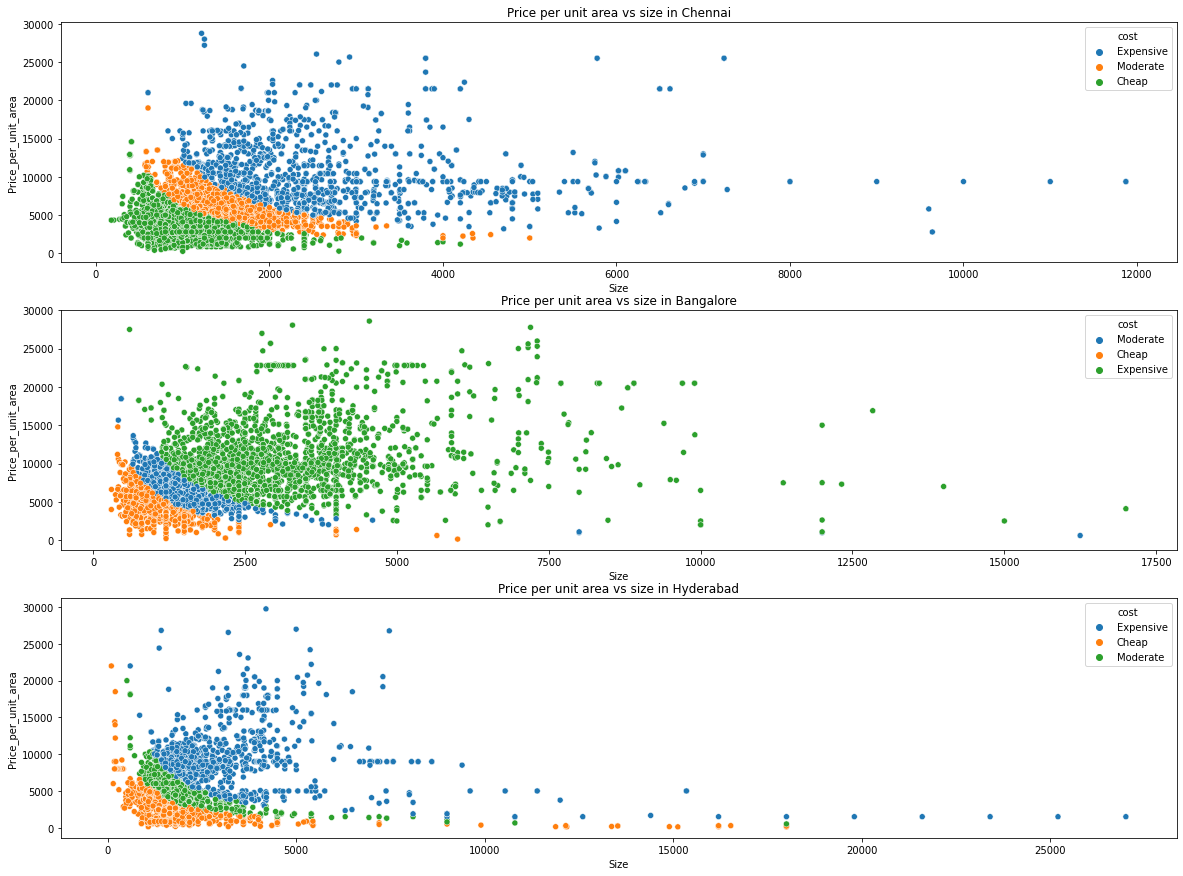

In [11]:
fig=plt.figure(figsize = [20,15])
fig.add_subplot(311)
sns.scatterplot(x='Size',y='Price_per_unit_area',hue='cost',data=Tech_city.where(Tech_city['City_name']=='Chennai').where(Tech_city['Price_per_unit_area']<30000)).set_title('Price per unit area vs size in Chennai')

fig.add_subplot(312)
sns.scatterplot(x='Size',y='Price_per_unit_area',hue='cost',data=Tech_city.where(Tech_city['City_name']=='Bangalore').where(Tech_city['Price_per_unit_area']<30000)).set_title('Price per unit area vs size in Bangalore')

fig.add_subplot(313)
sns.scatterplot(x='Size',y='Price_per_unit_area',hue='cost',data=Tech_city.where(Tech_city['City_name']=='Hyderabad').where(Tech_city['Price_per_unit_area']<30000)).set_title('Price per unit area vs size in Hyderabad')
plt.show()

## Question 3

### Plotting the no of large area properties in different economic ranges

the analysis we can get from this:-
1. We have very less large area properties which are cheap.
2. The moderate price range can give the buyer many options to work with

Text(0.5, 1.0, 'Number of large area properties in different economic ranges')

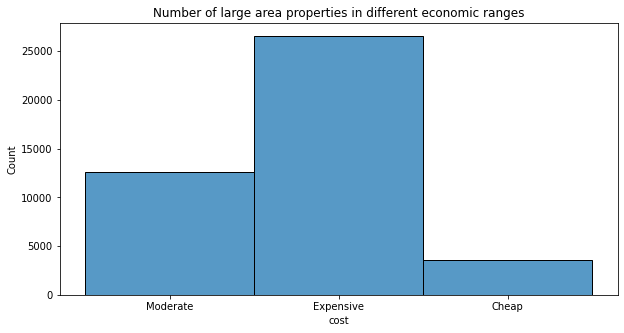

In [13]:
fig=plt.figure(figsize = [10,5])
large1=np.percentile(real_estate['Size'], 70)
sns.histplot(x='cost',data=real_estate.where(real_estate['Size']>large1)).set_title('Number of large area properties in different economic ranges')


### Average price of large area properties in cities

the analysis we get from this:-
1. This shows the average price of large area properties in different cities
2. We can find that the price is pretty low in lucknow making it perfect location to buy large area properties with less budgets

Text(0.5, 1.0, 'Average price in large area properites in different cities')

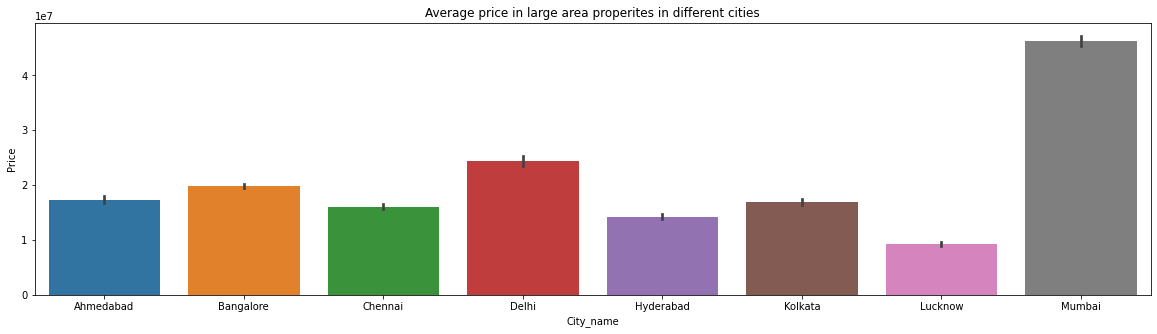

In [30]:
fig=plt.figure(figsize = [20,5])
sns.barplot(x='City_name',y='Price',data=real_estate.where(real_estate['Size']>large)).set_title('Average price in large area properites in different cities')

### Plotting number of large area properties in different cities

Text(0.5, 1.0, 'number of large area properties which have moderate price')

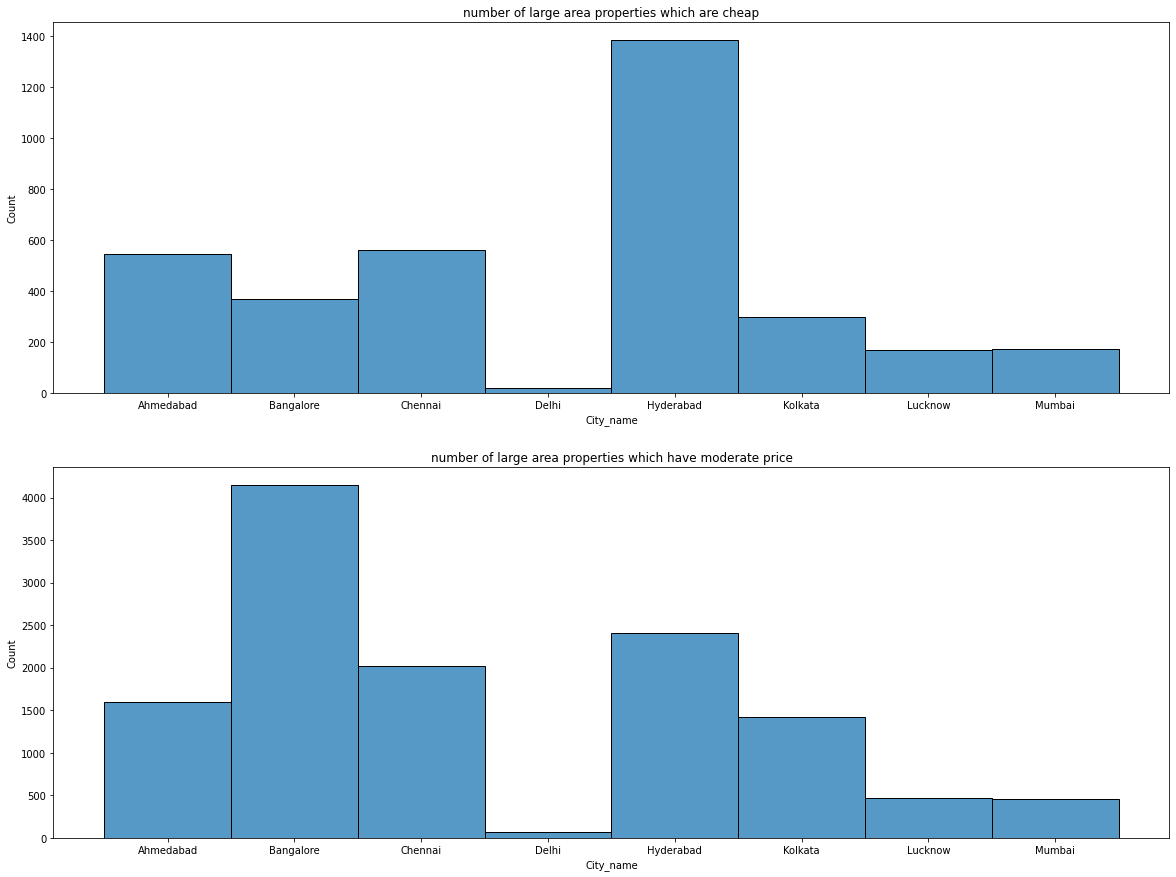

In [34]:
fig=plt.figure(figsize = [20,15])
fig.add_subplot(211)
sns.histplot(x='City_name',data=real_estate.where(real_estate['Size']>large).where(real_estate['cost']=='Cheap')).set_title('number of large area properties which are cheap')

fig.add_subplot(212)
sns.histplot(x='City_name',data=real_estate.where(real_estate['Size']>large).where(real_estate['cost']=='Moderate')).set_title('number of large area properties which have moderate price')



## Question 4

### Plotting Price and number of properties in different cities

We have plotted this to enable the buyer to select a city before going into localities of each city.

The analysis we can make from this:-
1. Average Price in cities is as follows: Delhi > Mumbai > Bangalore > Ahmedabad > Hyderabad > Chennai > Kolkata > Lucknow
2. The number of properties listed in cities is as follows: Mumbai > Bangalore > Chennai > Kolkata > Hyderabad > Delhi > Ahmedabad > Lucknow

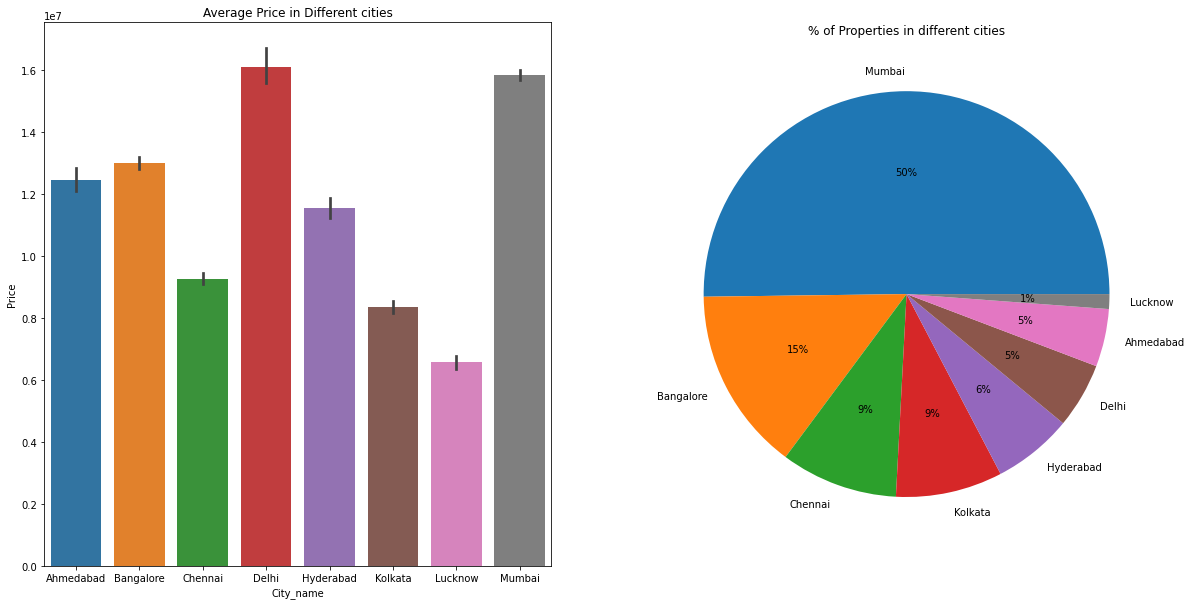

In [13]:
fig=plt.figure(figsize = [20,10])
fig.add_subplot(121)
sns.barplot(x='City_name',y='Price',data=real_estate).set(title='Average Price in Different cities')

fig.add_subplot(122)
plt.pie(real_estate['City_name'].value_counts(),labels=real_estate['City_name'].value_counts().index.tolist(),autopct='%.0f%%')
plt.title('% of Properties in different cities')
plt.show()

### Plotting Average price top localties of cities

The analysis we can get from this:-
1. it enables the buyer to see top 5 localities in each of the cities
2. It is helpful to pick a locality for buyer who wants to buy properties in one locality in a city

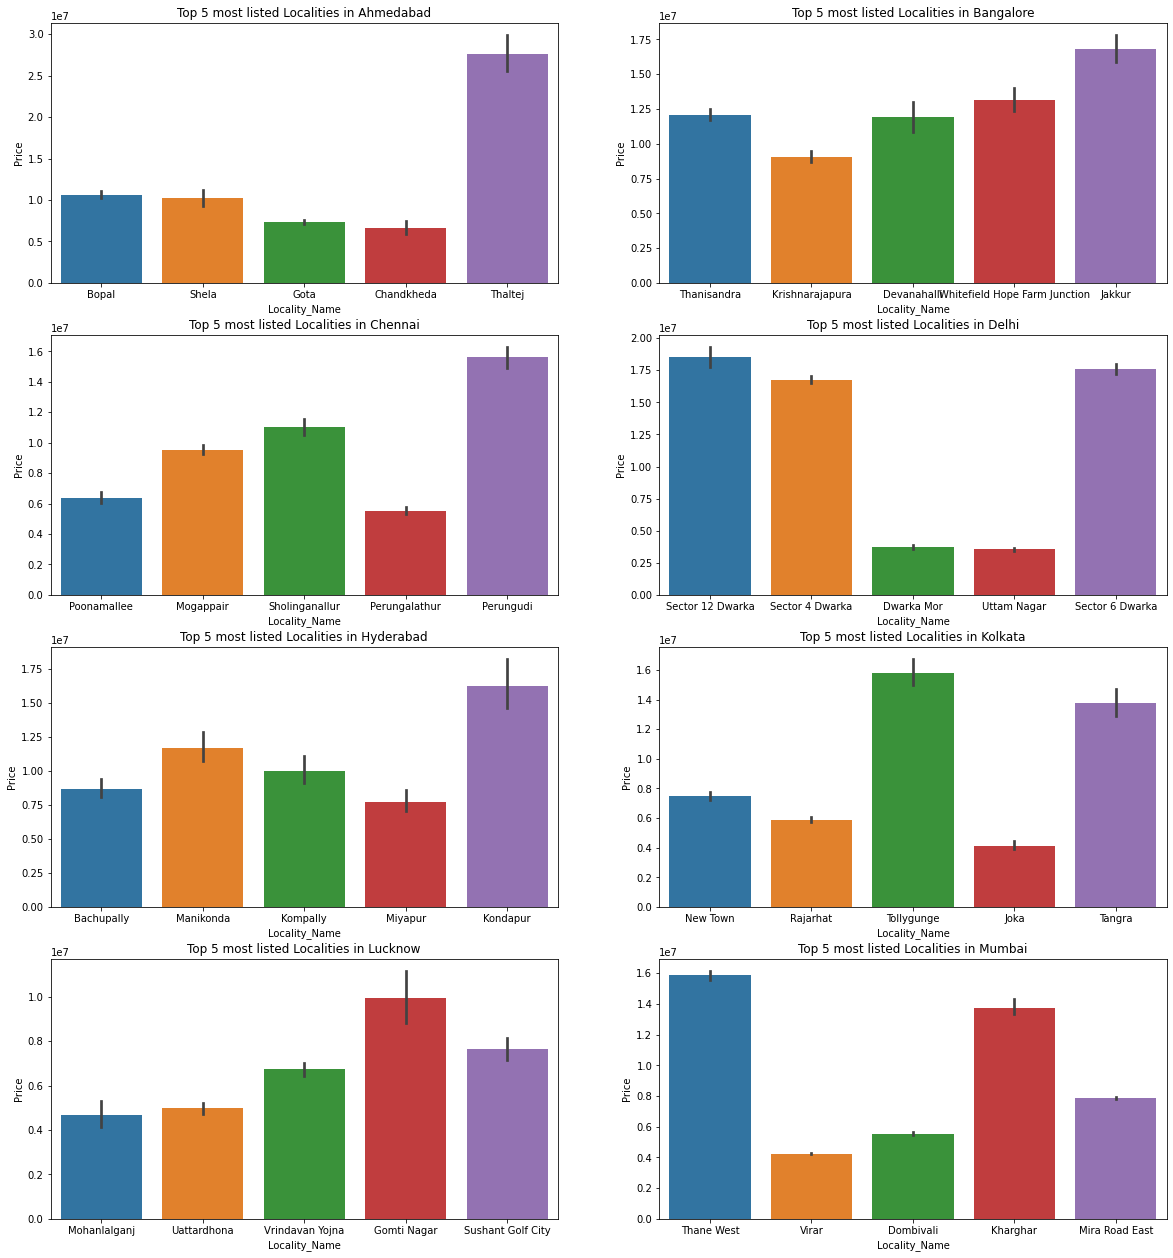

In [14]:
Ahmedabad_df = real_estate.loc[real_estate['City_name'] == "Ahmedabad"]
Bangalore_df = real_estate.loc[real_estate['City_name'] == "Bangalore"]
Chennai_df = real_estate.loc[real_estate['City_name'] == "Chennai"]
Delhi_df = real_estate.loc[real_estate['City_name'] == "Delhi"]
Hyderabad_df = real_estate.loc[real_estate['City_name'] == "Hyderabad"]
Kolkata_df = real_estate.loc[real_estate['City_name'] == "Kolkata"]
Lucknow_df = real_estate.loc[real_estate['City_name'] == "Lucknow"]
Mumbai_df = real_estate.loc[real_estate['City_name'] == "Mumbai"]
n = 5
# fig=sns.set(rc = {'figure.figsize':(8,8)})

fig=plt.figure(figsize = [20,22])
fig.add_subplot(421)
Ahmedabad1_df=Ahmedabad_df.loc[Ahmedabad_df['Locality_Name'].isin(Ahmedabad_df['Locality_Name'].value_counts().index.tolist()[:n])]
sns.barplot(x='Locality_Name',y='Price',data=Ahmedabad1_df).set(title='Top 5 most listed Localities in Ahmedabad')

fig.add_subplot(422)
Bangalore1_df=Bangalore_df.loc[Bangalore_df['Locality_Name'].isin(Bangalore_df['Locality_Name'].value_counts().index.tolist()[:n])]
sns.barplot(x='Locality_Name',y='Price',data=Bangalore1_df).set(title='Top 5 most listed Localities in Bangalore')

fig.add_subplot(423)
Chennai1_df=Chennai_df.loc[Chennai_df['Locality_Name'].isin(Chennai_df['Locality_Name'].value_counts().index.tolist()[:n])]
sns.barplot(x='Locality_Name',y='Price',data=Chennai1_df).set(title='Top 5 most listed Localities in Chennai')

fig.add_subplot(424)
Delhi1_df=Delhi_df.loc[Delhi_df['Locality_Name'].isin(Delhi_df['Locality_Name'].value_counts().index.tolist()[:n])]
sns.barplot(x='Locality_Name',y='Price',data=Delhi1_df).set(title='Top 5 most listed Localities in Delhi')

fig.add_subplot(425)
Hyderabad1_df=Hyderabad_df.loc[Hyderabad_df['Locality_Name'].isin(Hyderabad_df['Locality_Name'].value_counts().index.tolist()[:n])]
sns.barplot(x='Locality_Name',y='Price',data=Hyderabad1_df).set(title='Top 5 most listed Localities in Hyderabad')

fig.add_subplot(426)
Kolkata1_df=Kolkata_df.loc[Kolkata_df['Locality_Name'].isin(Kolkata_df['Locality_Name'].value_counts().index.tolist()[:n])]
sns.barplot(x='Locality_Name',y='Price',data=Kolkata1_df).set(title='Top 5 most listed Localities in Kolkata')

fig.add_subplot(427)
Lucknow1_df=Lucknow_df.loc[Lucknow_df['Locality_Name'].isin(Lucknow_df['Locality_Name'].value_counts().index.tolist()[:n])]
sns.barplot(x='Locality_Name',y='Price',data=Lucknow1_df).set(title='Top 5 most listed Localities in Lucknow')

fig.add_subplot(428)
Mumbai1_df=Mumbai_df.loc[Mumbai_df['Locality_Name'].isin(Mumbai_df['Locality_Name'].value_counts().index.tolist()[:n])]
sns.barplot(x='Locality_Name',y='Price',data=Mumbai1_df).set(title='Top 5 most listed Localities in Mumbai')

plt.show()

### Plotting number of unique localities in cities

The analysis we can get from this:-
1. Gives the number of different localities available in a city
2. Gives the number of different sub Urbans available in a city
3. Useful for buyers who wants to spread their properties across different localities in a city.
4. For example, for such a buyer- Bangalore might be the best option as it has a large number of different localities and sub urban areas.

Text(0, 0.5, 'No. of unique Sub urban area')

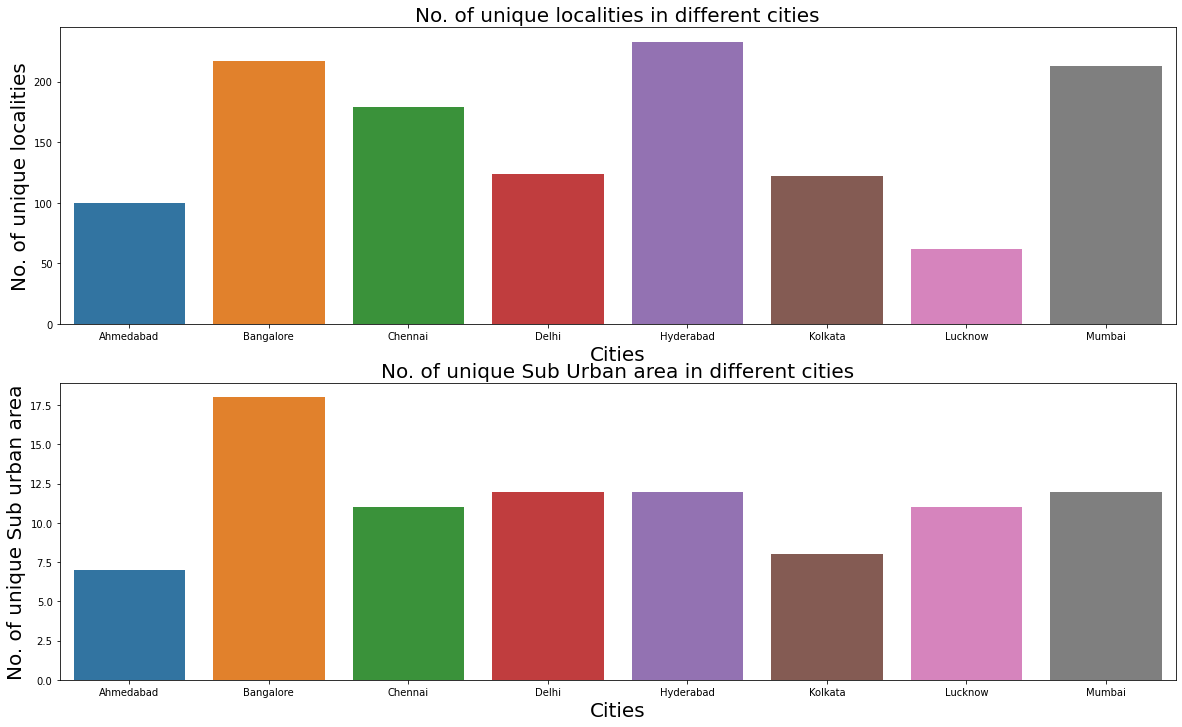

In [15]:

Cities=["Ahmedabad","Bangalore","Chennai","Delhi","Hyderabad","Kolkata","Lucknow","Mumbai"]
Unique_localities=[len(pd.unique(Ahmedabad_df['Locality_Name'])),len(pd.unique(Bangalore_df['Locality_Name'])),len(pd.unique(Chennai_df['Locality_Name'])),len(pd.unique(Delhi_df['Locality_Name'])),len(pd.unique(Hyderabad_df['Locality_Name'])),len(pd.unique(Kolkata_df['Locality_Name'])),len(pd.unique(Lucknow_df['Locality_Name'])),len(pd.unique(Mumbai_df['Locality_Name']))]
Unique_Suburbs=[len(pd.unique(Ahmedabad_df['Sub_urban_name'])),len(pd.unique(Bangalore_df['Sub_urban_name'])),len(pd.unique(Chennai_df['Sub_urban_name'])),len(pd.unique(Delhi_df['Sub_urban_name'])),len(pd.unique(Hyderabad_df['Sub_urban_name'])),len(pd.unique(Kolkata_df['Sub_urban_name'])),len(pd.unique(Lucknow_df['Sub_urban_name'])),len(pd.unique(Mumbai_df['Sub_urban_name']))]

fig=plt.figure(figsize = [20,12])
fig.add_subplot(211)
p=sns.barplot(x=Cities,y=Unique_localities)
p.set_title('No. of unique localities in different cities', fontsize = 20)
p.set_xlabel("Cities", fontsize = 20)
p.set_ylabel("No. of unique localities", fontsize = 20)
fig.add_subplot(212)
p1=sns.barplot(x=Cities,y=Unique_Suburbs)
p1.set_title('No. of unique Sub Urban area in different cities', fontsize = 20)
p1.set_xlabel("Cities", fontsize = 20)
p1.set_ylabel("No. of unique Sub urban area", fontsize = 20)

## Question 5

### Plotting number of properties in top localities of business cities

the analysis we can get from this:-
1. Percentage of properties listed in top 15 localities in Mumbai and Ahmedabad
2. This gives the buyer an idea of the hotspots present in business cities like Mumbai and Ahmedabad.

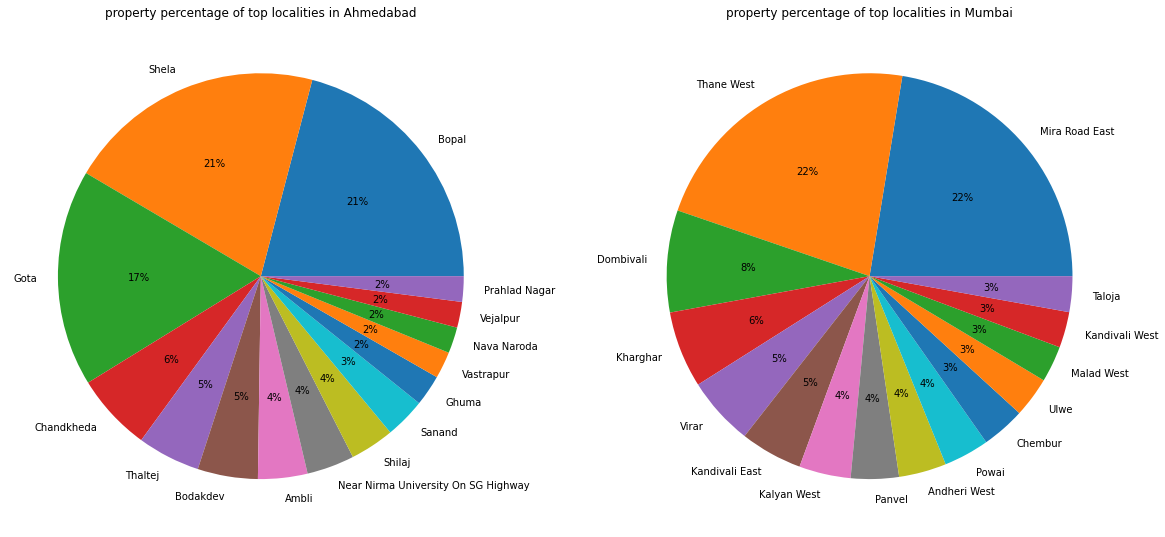

In [16]:
n = 15
fig=plt.figure(figsize = [20,10])

fig.add_subplot(121)
Ahmedabad2_df=Ahmedabad_df.loc[Ahmedabad_df['Locality_Name'].isin(Ahmedabad_df['Locality_Name'].value_counts().index.tolist()[:n])]
# sns.histplot(x='Locality_Name',data=Ahmedabad2_df)
plt.pie(Ahmedabad2_df['Locality_Name'].value_counts(),labels=Ahmedabad2_df['Locality_Name'].value_counts().index.tolist(),autopct='%.0f%%')
plt.title('property percentage of top localities in Ahmedabad')

fig.add_subplot(122)
Mumbai2_df=Mumbai_df.loc[Mumbai_df['Locality_Name'].isin(Mumbai_df['Locality_Name'].value_counts().index.tolist()[:n])]
plt.pie(Mumbai2_df['Locality_Name'].value_counts(),labels=Mumbai2_df['Locality_Name'].value_counts().index.tolist(),autopct='%.0f%%')
plt.title('property percentage of top localities in Mumbai')
plt.show()

### Plotting the average price in top localities in business cities

the analysis we can get from this:-
1. gives the average price per unit area in top hotspots of Ahmedabad and Mumbai
2. As the value of the place is high, usually it will be a comercial place, so it gives the buyer an idea of the prices in these hotspots

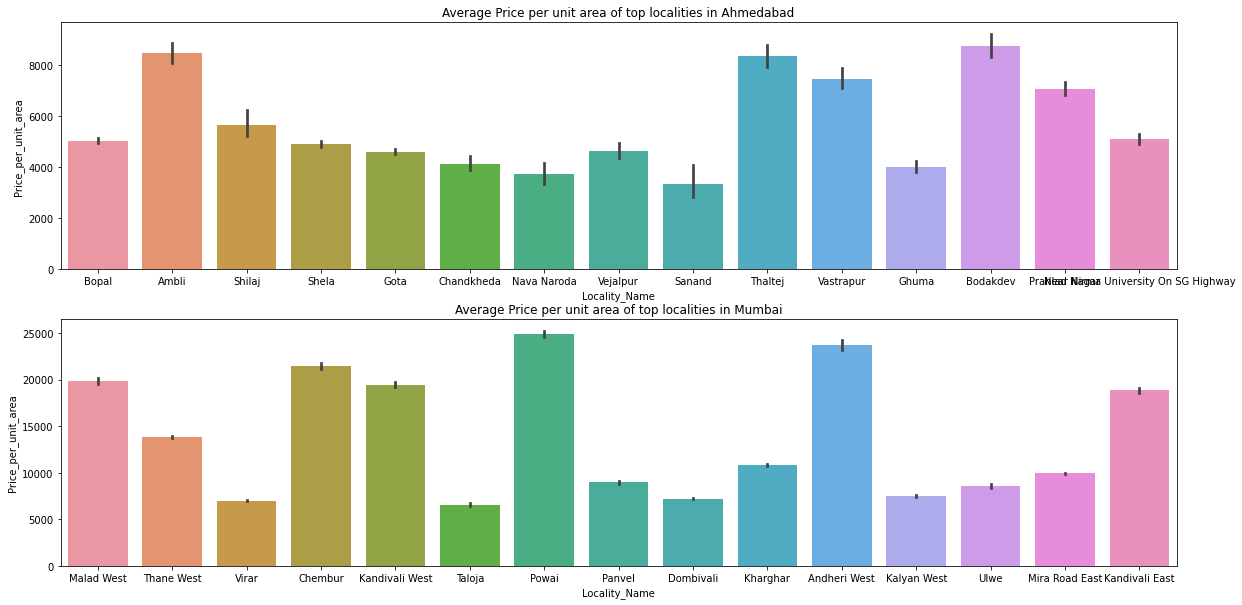

In [17]:
fig=plt.figure(figsize = [20,10])
fig.add_subplot(211)
sns.barplot(x='Locality_Name',y='Price_per_unit_area',data=Ahmedabad2_df).set(title='Average Price per unit area of top localities in Ahmedabad')

fig.add_subplot(212)
sns.barplot(x='Locality_Name',y='Price_per_unit_area',data=Mumbai2_df).set(title='Average Price per unit area of top localities in Mumbai')
plt.show()